<a href="https://colab.research.google.com/github/jfr11101/MyProjects/blob/main/breast_cancer_wisconsin_diagnosis_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("breast_cancer.csv")

data.head


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##features and target data

In [9]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [10]:
X = data.drop(['diagnosis'], axis=1)
Y = data.diagnosis.values

In [11]:
X.shape


(569, 30)

##Normalization


In [13]:
X = (X - np.min(X))/(np.max(X) - np.min(X)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

##Split to train and test

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.15,
                                                    random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


#Functions


##weight & bias

In [18]:
def weights_bias(dimension):
  w = np.full((dimension, 1), 0.01)
  b = 0.0

  return w, b

##Sigmoid Function (to calculating z value)

In [19]:
def sigmoid(z):
  y_hat = 1/(1+np.exp(-z))
  return y_hat

##Forward-Backward Propagation

In [23]:
def forward_backward_propagation(w, b, x_train, y_train):
	z = np.dot(w.T, x_train) + b
	y_hat = sigmoid(z)
	loss = - y_train * np.log(y_hat) - (1 - y_train) * np.log(1 - y_hat)
	cost = (np.sum(loss)) / x_train.shape[1]	# for scaling

	derivative_weight = (np.dot(x_train,
                             ((y_hat - y_train).T))) / x_train.shape[1]
	derivative_bias = np.sum(y_hat-y_train) / x_train.shape[1]
	gradients = {"derivative_weight": derivative_weight,
              "derivative_bias": derivative_bias}

	return cost, gradients


##Updating Parameters

In [24]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	# updating(learning) parameters
	for i in range(number_of_iterarion):
		# make forward and backward propagation and find cost and gradients
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
		cost_list.append(cost)

		# lets update
		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	# update(learn) parameters weights and bias
	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()

	return parameters, gradients, cost_list


##Predictions

In [25]:
def predict(w, b, x_test):
	# x_test is a input for forward propagation
	z = sigmoid(np.dot(w.T, x_test)+b)
	Y_prediction = np.zeros((1, x_test.shape[1]))

	# if z is bigger than 0.5, our prediction is sign one (y_hat = 1),
	# if z is smaller than 0.5, our prediction is sign zero (y_hat = 0),
	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction


##Logistic Regression

In [26]:
def logistic_regression(x_train, y_train,
                        x_test, y_test,
                        learning_rate, num_iterations):

	dimension = x_train.shape[0]
	w, b = weights_bias(dimension)

	parameters, gradients, cost_list = update(w, b,
                                           x_train, y_train,
                                           learning_rate, num_iterations)

	y_prediction_test = predict(parameters["weight"],
                             parameters["bias"], x_test)

	y_prediction_train = predict(parameters["weight"],
                              parameters["bias"], x_train)

	# train / test Errors
	print("train accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
	print("test accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))


Cost after iteration  0:  0.729671
Cost after iteration  10:  0.037836
Cost after iteration  20:  0.020488
Cost after iteration  30:  0.014155
Cost after iteration  40:  0.010849
Cost after iteration  50:  0.008811
Cost after iteration  60:  0.007427
Cost after iteration  70:  0.006423
Cost after iteration  80:  0.005662
Cost after iteration  90:  0.005065


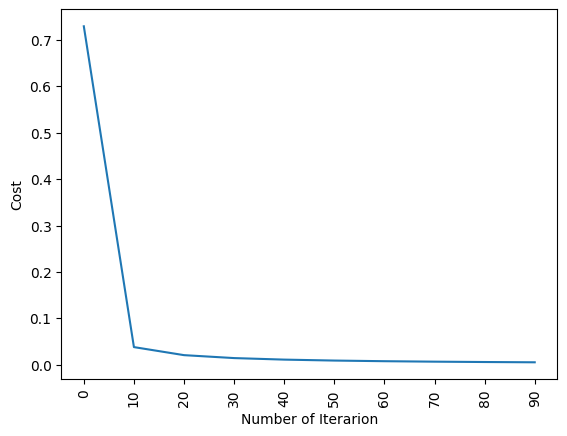

train accuracy: 100.0 %
test accuracy: 100.0 %


In [27]:
logistic_regression(x_train, y_train,
                    x_test,y_test,
                    learning_rate = 1,
                    num_iterations = 100)


##Linear model


In [28]:
from sklearn import linear_model

model_LR = linear_model.LogisticRegression(random_state = 42,
                                         max_iter = 150)
print("test accuracy: {} ".format(
	model_LR.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
	model_LR.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


ValueError: ignored